# Airlines

## Hierarchical

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('D:/ExcelR/A7 clustering/EastWestAirlines.csv')

In [3]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
X = dataset.iloc[:,1:].values

In [6]:
sc = StandardScaler()
X[:,[0,1,5,6,7,8,9]] = sc.fit_transform(X[:,[0,1,5,6,7,8,9]])

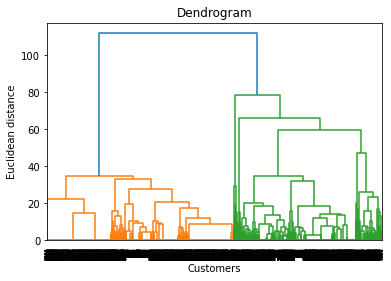

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [8]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [9]:
y_hc = hc.fit_predict(X)
Clusters = pd.DataFrame(y_hc)

In [10]:
dataset['h_clusterid'] = Clusters

In [11]:
dataset.head(50)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,0,0,1,1,1,0,-1,0,0,1,0,4
1,2,0,0,1,1,1,0,0,0,0,1,0,4
2,3,0,0,1,1,1,0,0,0,0,1,0,4
3,4,0,0,1,1,1,0,-1,0,0,1,0,4
4,5,0,0,4,1,1,1,1,1,0,1,1,1
5,6,0,0,1,1,1,0,-1,0,0,1,0,4
6,7,0,0,3,1,1,0,1,0,0,1,0,1
7,8,0,0,1,1,1,0,0,0,0,1,1,4
8,9,3,0,3,2,1,0,3,2,2,1,1,4
9,10,0,0,3,1,1,0,1,0,0,1,1,1


## K-means

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = pd.read_csv('D:/ExcelR/A7 clustering/EastWestAirlines.csv')

In [14]:
X2 = dataset.iloc[:,1:].values

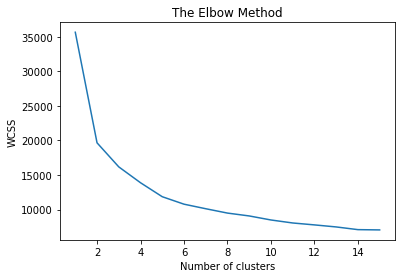

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)

In [17]:
data['h_clusterid'] = y_kmeans

In [18]:
data.head(50)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('D:/ExcelR/A7 clustering/EastWestAirlines.csv')

In [21]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
dfcopy = df.drop(['ID#'],axis=1).values

In [23]:
stscaler = StandardScaler().fit(dfcopy)
X3 = stscaler.transform(dfcopy)

In [24]:
dbscan = DBSCAN(eps=1.9, min_samples=5)
dbscan.fit(X3)

DBSCAN(eps=1.9)

In [25]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [27]:
df = pd.concat([df,cl], axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  cluster            3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB


In [29]:
df.head(50)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [30]:
df['cluster'].value_counts()

 0    2442
 1    1314
-1     204
 2      16
 3       9
 4       7
 5       7
Name: cluster, dtype: int64

## KMedoids

In [31]:
from sklearn_extra.cluster import KMedoids

In [32]:
kmedoids = KMedoids(n_clusters=8).fit(X3)

In [33]:
kmedoids.labels_

array([7, 7, 3, ..., 2, 1, 1], dtype=int64)

In [34]:
cl = pd.DataFrame(kmedoids.labels_, columns=['cluster_kmedoids'])
pd.concat([df,cl], axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_kmedoids
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,5
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1
